In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms
from netCDF4 import Dataset

In [71]:
dir = './slidingco'
exp = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]
stdvel = []
stdthk = []
costvel = []
costregu = []
maxvel = []
meanvel = []
onestdvel = []
maxthk = []
meanthk = []
onestdthk = []
icevol = []

for e in exp:
    rms = np.loadtxt(dir + '/' + str(e) + '/rms_std.dat')
    stdvel.append(rms[-1, 3])
    stdthk.append(rms[-1, 1])

    costs = np.loadtxt(dir + '/' + str(e) + '/costs.dat')
    costvel.append(costs[-1, 0])
    costregu.append(costs[-1, 4])

    output = Dataset(dir + '/' + str(e) + '/output.nc')
    maxvel.append(np.max(output.variables['velbase_mag'][-1]))
    meanvel.append(np.mean(output.variables['velbase_mag'][-1]))
    onestdvel.append(np.std(output.variables['velbase_mag'][-1]))
    maxthk.append(np.max(output.variables['thk'][-1]))
    meanthk.append(np.mean(output.variables['thk'][-1]))
    onestdthk.append(np.std(output.variables['thk'][-1]))
    icevol.append(np.sum(output.variables['thk'][-1] * 100**2 * 1e-9))

sliding_data = {
    'Directory': dir,
    'Experiment': exp,
    'Normalized': [(e - np.min(exp)) / (np.max(exp) - np.min(exp)) for e in exp],
    'STD velocity': stdvel,
    'STD ice thickness': stdthk,
    'COST velocity': costvel,
    'COST regularization': costregu,
    'MAX velocity': maxvel,
    'MEAN velocity': meanvel,
    '1SIGMA velocity': [meanvel[i] + onestdvel[i] for i in range(len(exp))],
    '2SIGMA velocity': [meanvel[i] + 2 * onestdvel[i] for i in range(len(exp))],
    'MAX ice thickness': maxthk,
    '1SIGMA thickness': [meanthk[i] + onestdthk[i] for i in range(len(exp))],
    '2SIGMA thickness': [meanthk[i] + 2 * onestdthk[i] for i in range(len(exp))],
    'Ice Volume': icevol
}
sliding = pd.DataFrame.from_dict(sliding_data)

In [59]:
dir = './anisotropy'
exp = ['005', '01', '02', '04', '08']
stdvel = []
stdthk = []
costvel = []
costregu = []
maxvel = []
meanvel = []
onestdvel = []
maxthk = []
meanthk = []
onestdthk = []
icevol = []

for e in exp:
    rms = np.loadtxt(dir + '/' + str(e) + '/rms_std.dat')
    stdvel.append(rms[-1, 3])
    stdthk.append(rms[-1, 1])

    costs = np.loadtxt(dir + '/' + str(e) + '/costs.dat')
    costvel.append(costs[-1, 0])
    costregu.append(costs[-1, 4])

    output = Dataset(dir + '/' + str(e) + '/output.nc')
    maxvel.append(np.max(output.variables['velbase_mag'][-1]))
    meanvel.append(np.mean(output.variables['velbase_mag'][-1]))
    onestdvel.append(np.std(output.variables['velbase_mag'][-1]))
    maxthk.append(np.max(output.variables['thk'][-1]))
    meanthk.append(np.mean(output.variables['thk'][-1]))
    onestdthk.append(np.std(output.variables['thk'][-1]))
    icevol.append(np.sum(output.variables['thk'][-1] * 100**2 * 1e-9))

anisotropy_data = {
    'Directory': dir,
    'Experiment': exp,
    'Normalized': [0.05, 0.1, 0.2, 0.4, 0.8],
    'STD velocity': stdvel,
    'STD ice thickness': stdthk,
    'COST velocity': costvel,
    'COST regularization': costregu,
    'MAX velocity': maxvel,
    'MEAN velocity': meanvel,
    '1SIGMA velocity': [meanvel[i] + onestdvel[i] for i in range(len(exp))],
    '2SIGMA velocity': [meanvel[i] + 2 * onestdvel[i] for i in range(len(exp))],
    'MAX ice thickness': maxthk,
    '1SIGMA thickness': [meanthk[i] + onestdthk[i] for i in range(len(exp))],
    '2SIGMA thickness': [meanthk[i] + 2 * onestdthk[i] for i in range(len(exp))],
    'Ice Volume': icevol
}
anisotropy = pd.DataFrame.from_dict(anisotropy_data)

In [60]:
dir = './thkregu'
exp = ['null', '01', '02', 'base']
stdvel = []
stdthk = []
costvel = []
costregu = []
maxvel = []
meanvel = []
onestdvel = []
maxthk = []
meanthk = []
onestdthk = []
icevol = []

for e in exp:
    rms = np.loadtxt(dir + '/' + str(e) + '/rms_std.dat')
    stdvel.append(rms[-1, 3])
    stdthk.append(rms[-1, 1])

    costs = np.loadtxt(dir + '/' + str(e) + '/costs.dat')
    costvel.append(costs[-1, 0])
    costregu.append(costs[-1, 4])

    output = Dataset(dir + '/' + str(e) + '/output.nc')
    maxvel.append(np.max(output.variables['velbase_mag'][-1]))
    meanvel.append(np.mean(output.variables['velbase_mag'][-1]))
    onestdvel.append(np.std(output.variables['velbase_mag'][-1]))
    maxthk.append(np.max(output.variables['thk'][-1]))
    meanthk.append(np.mean(output.variables['thk'][-1]))
    onestdthk.append(np.std(output.variables['thk'][-1]))
    icevol.append(np.sum(output.variables['thk'][-1] * 100**2 * 1e-9))

thkregu_data = {
    'Directory': dir,
    'Experiment': exp,
    'Normalized': [0.001, 0.1, 0.2, 1.0],
    'STD velocity': stdvel,
    'STD ice thickness': stdthk,
    'COST velocity': costvel,
    'COST regularization': costregu,
    'MAX velocity': maxvel,
    'MEAN velocity': meanvel,
    '1SIGMA velocity': [meanvel[i] + onestdvel[i] for i in range(len(exp))],
    '2SIGMA velocity': [meanvel[i] + 2 * onestdvel[i] for i in range(len(exp))],
    'MAX ice thickness': maxthk,
    '1SIGMA thickness': [meanthk[i] + onestdthk[i] for i in range(len(exp))],
    '2SIGMA thickness': [meanthk[i] + 2 * onestdthk[i] for i in range(len(exp))],
    'Ice Volume': icevol
}
thkregu = pd.DataFrame.from_dict(thkregu_data)

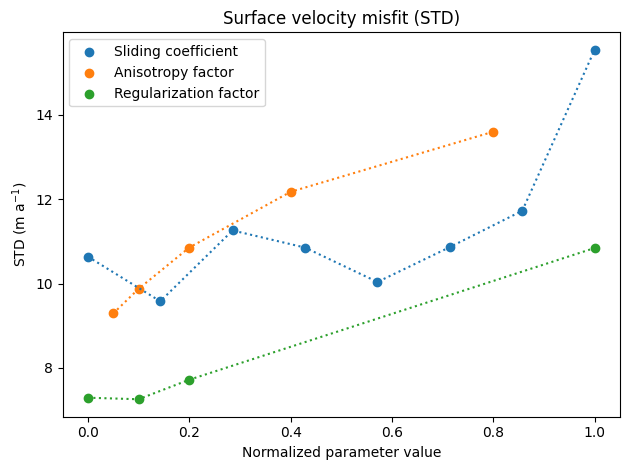

In [19]:
fig, ax = plt.subplots(sharey = True, sharex = True)

ax.scatter(sliding['Normalized'], sliding['STD velocity'], label = 'Sliding coefficient')
ax.plot(sliding['Normalized'], sliding['STD velocity'], linestyle = ':')

ax.scatter(anisotropy['Normalized'], anisotropy['STD velocity'], label = 'Anisotropy factor')
ax.plot(anisotropy['Normalized'], anisotropy['STD velocity'], linestyle = ':')

ax.scatter(thkregu['Normalized'], thkregu['STD velocity'], label = 'Regularization factor')
ax.plot(thkregu['Normalized'], thkregu['STD velocity'], linestyle = ':')
    
ax.set_title('Surface velocity misfit (STD)')
ax.set_ylabel('STD (m a$^{-1}$)')
ax.set_xlabel('Normalized parameter value')

plt.legend()
plt.tight_layout()
plt.show()

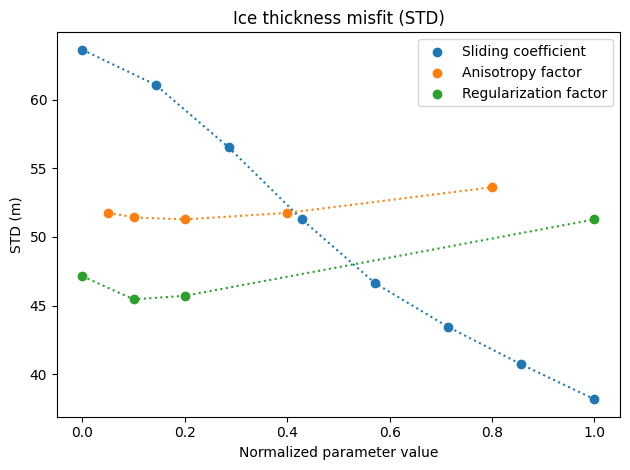

In [20]:
fig, ax = plt.subplots(sharey = True, sharex = True)

ax.scatter(sliding['Normalized'], sliding['STD ice thickness'], label = 'Sliding coefficient')
ax.plot(sliding['Normalized'], sliding['STD ice thickness'], linestyle = ':')

ax.scatter(anisotropy['Normalized'], anisotropy['STD ice thickness'], label = 'Anisotropy factor')
ax.plot(anisotropy['Normalized'], anisotropy['STD ice thickness'], linestyle = ':')

ax.scatter(thkregu['Normalized'], thkregu['STD ice thickness'], label = 'Regularization factor')
ax.plot(thkregu['Normalized'], thkregu['STD ice thickness'], linestyle = ':')
    
ax.set_title('Ice thickness misfit (STD)')
ax.set_ylabel('STD (m)')
ax.set_xlabel('Normalized parameter value')

plt.legend()
plt.tight_layout()
plt.show()

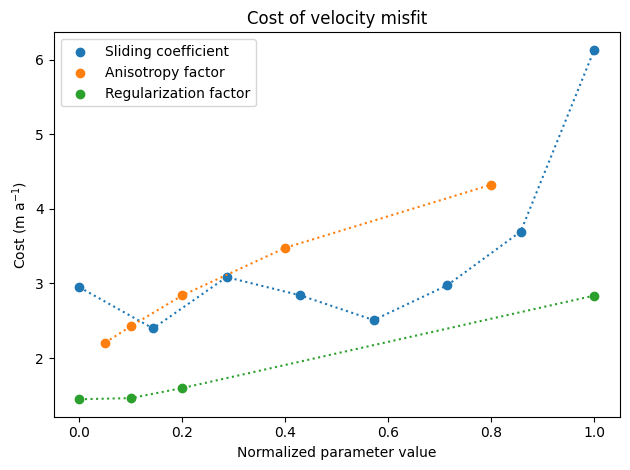

In [55]:
fig, ax = plt.subplots(sharey = True, sharex = True)
field = 'COST velocity'

ax.scatter(sliding['Normalized'], sliding[field], label = 'Sliding coefficient')
ax.plot(sliding['Normalized'], sliding[field], linestyle = ':')

ax.scatter(anisotropy['Normalized'], anisotropy[field], label = 'Anisotropy factor')
ax.plot(anisotropy['Normalized'], anisotropy[field], linestyle = ':')

ax.scatter(thkregu['Normalized'], thkregu[field], label = 'Regularization factor')
ax.plot(thkregu['Normalized'], thkregu[field], linestyle = ':')
    
ax.set_title('Cost of velocity misfit')
ax.set_ylabel('Cost (m a$^{-1}$)')
ax.set_xlabel('Normalized parameter value')

plt.legend()
plt.tight_layout()
plt.show()

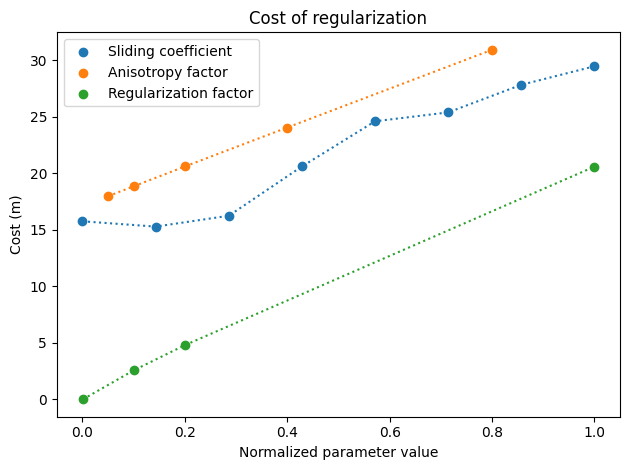

In [73]:
fig, ax = plt.subplots(sharey = True, sharex = True)
field = 'COST regularization'

ax.scatter(sliding['Normalized'], sliding[field], label = 'Sliding coefficient')
ax.plot(sliding['Normalized'], sliding[field], linestyle = ':')

ax.scatter(anisotropy['Normalized'], anisotropy[field], label = 'Anisotropy factor')
ax.plot(anisotropy['Normalized'], anisotropy[field], linestyle = ':')

ax.scatter(thkregu['Normalized'], thkregu[field], label = 'Regularization factor')
ax.plot(thkregu['Normalized'], thkregu[field], linestyle = ':')
    
ax.set_title('Cost of regularization')
ax.set_ylabel('Cost (m)')
ax.set_xlabel('Normalized parameter value')

plt.legend()
plt.tight_layout()
plt.show()

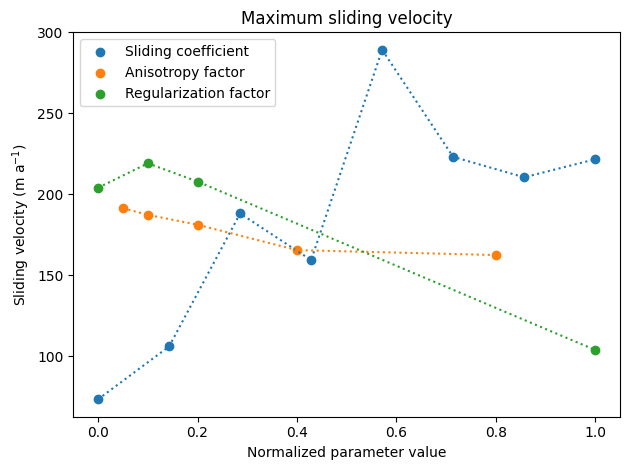

In [21]:
fig, ax = plt.subplots(sharey = True, sharex = True)
field = 'MAX velocity'

ax.scatter(sliding['Normalized'], sliding[field], label = 'Sliding coefficient')
ax.plot(sliding['Normalized'], sliding[field], linestyle = ':')

ax.scatter(anisotropy['Normalized'], anisotropy[field], label = 'Anisotropy factor')
ax.plot(anisotropy['Normalized'], anisotropy[field], linestyle = ':')

ax.scatter(thkregu['Normalized'], thkregu[field], label = 'Regularization factor')
ax.plot(thkregu['Normalized'], thkregu[field], linestyle = ':')
    
ax.set_title('Maximum sliding velocity')
ax.set_ylabel('Sliding velocity (m a$^{-1}$)')
ax.set_xlabel('Normalized parameter value')

plt.legend()
plt.tight_layout()
plt.show()

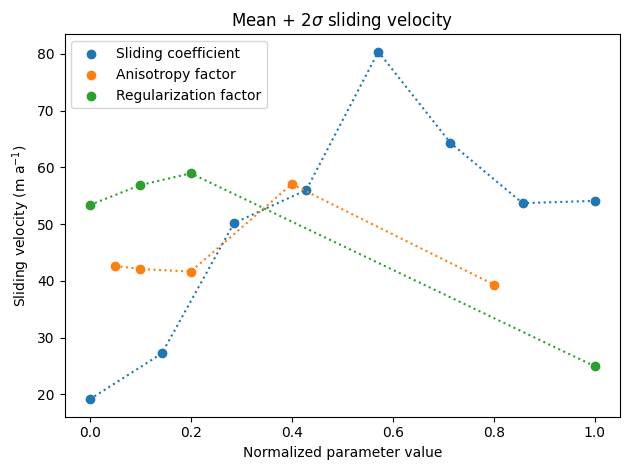

In [33]:
fig, ax = plt.subplots(sharey = True, sharex = True)
field = '2SIGMA velocity'

ax.scatter(sliding['Normalized'], sliding[field], label = 'Sliding coefficient')
ax.plot(sliding['Normalized'], sliding[field], linestyle = ':')

ax.scatter(anisotropy['Normalized'], anisotropy[field], label = 'Anisotropy factor')
ax.plot(anisotropy['Normalized'], anisotropy[field], linestyle = ':')

ax.scatter(thkregu['Normalized'], thkregu[field], label = 'Regularization factor')
ax.plot(thkregu['Normalized'], thkregu[field], linestyle = ':')
    
ax.set_title('Mean + $2\sigma$ sliding velocity')
ax.set_ylabel('Sliding velocity (m a$^{-1}$)')
ax.set_xlabel('Normalized parameter value')

plt.legend()
plt.tight_layout()
plt.show()

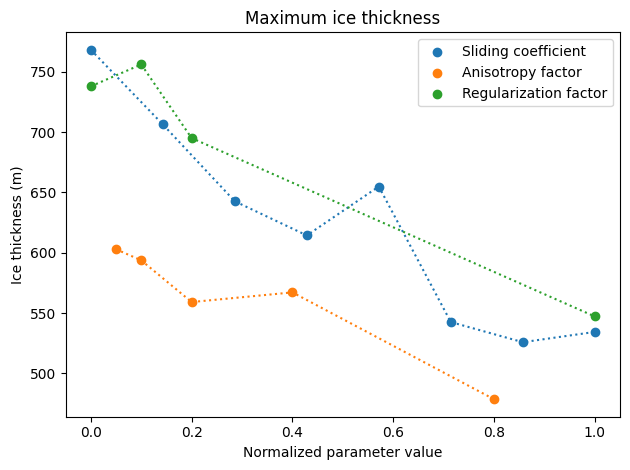

In [53]:
fig, ax = plt.subplots(sharey = True, sharex = True)
field = 'MAX ice thickness'

ax.scatter(sliding['Normalized'], sliding[field], label = 'Sliding coefficient')
ax.plot(sliding['Normalized'], sliding[field], linestyle = ':')

ax.scatter(anisotropy['Normalized'], anisotropy[field], label = 'Anisotropy factor')
ax.plot(anisotropy['Normalized'], anisotropy[field], linestyle = ':')

ax.scatter(thkregu['Normalized'], thkregu[field], label = 'Regularization factor')
ax.plot(thkregu['Normalized'], thkregu[field], linestyle = ':')
    
ax.set_title('Maximum ice thickness')
ax.set_ylabel('Ice thickness (m)')
ax.set_xlabel('Normalized parameter value')

plt.legend()
plt.tight_layout()
plt.show()

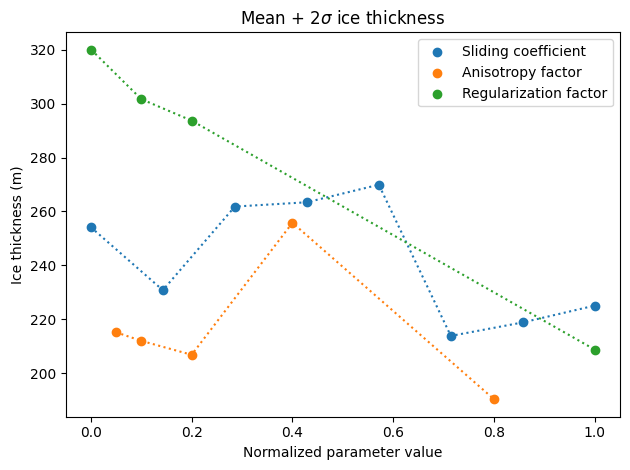

In [61]:
fig, ax = plt.subplots(sharey = True, sharex = True)
field = '2SIGMA thickness'

ax.scatter(sliding['Normalized'], sliding[field], label = 'Sliding coefficient')
ax.plot(sliding['Normalized'], sliding[field], linestyle = ':')

ax.scatter(anisotropy['Normalized'], anisotropy[field], label = 'Anisotropy factor')
ax.plot(anisotropy['Normalized'], anisotropy[field], linestyle = ':')

ax.scatter(thkregu['Normalized'], thkregu[field], label = 'Regularization factor')
ax.plot(thkregu['Normalized'], thkregu[field], linestyle = ':')
    
ax.set_title('Mean + $2\sigma$ ice thickness')
ax.set_ylabel('Ice thickness (m)')
ax.set_xlabel('Normalized parameter value')

plt.legend()
plt.tight_layout()
plt.show()

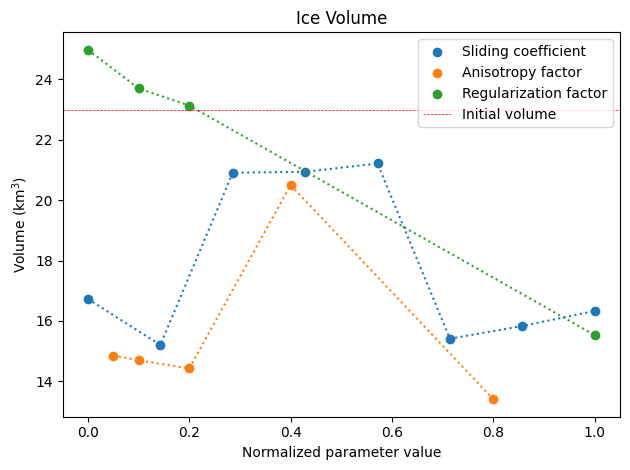

In [51]:
fig, ax = plt.subplots(sharey = True, sharex = True)
field = 'Ice Volume'

ax.scatter(sliding['Normalized'], sliding[field], label = 'Sliding coefficient')
ax.plot(sliding['Normalized'], sliding[field], linestyle = ':')

ax.scatter(anisotropy['Normalized'], anisotropy[field], label = 'Anisotropy factor')
ax.plot(anisotropy['Normalized'], anisotropy[field], linestyle = ':')

ax.scatter(thkregu['Normalized'], thkregu[field], label = 'Regularization factor')
ax.plot(thkregu['Normalized'], thkregu[field], linestyle = ':')
    
ax.set_title('Ice Volume')
ax.set_ylabel('Volume (km$^3$)')
ax.set_xlabel('Normalized parameter value')

ax.axhline(23, linestyle = '--', lw = 0.5, color = 'red', label = 'Initial volume')

plt.legend()
plt.tight_layout()
plt.show()